# time_series

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# getting the data 
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### Use the above dataset for the exercises below:

- Resample by the day and take the average temperature. Visualize the average temperature over time.
- Write the code necessary to visualize the minimum temperature over time.
- Write the code necessary to visualize the maximum temperature over time.
- Which month is the coldest, on average?
- Which month has the highest average temperature?
- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [3]:
# assining the data to df
df = data.sf_temps()

In [4]:
# setting the index of the data to 'date' and then sorting
df = df.set_index('date').sort_index()

In [5]:
df.head() # check_yo_head

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
# resample the data by day 'D' and taking the mean
df1 = df.resample('D').mean()

In [7]:
df1.head() # check_yo_head

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

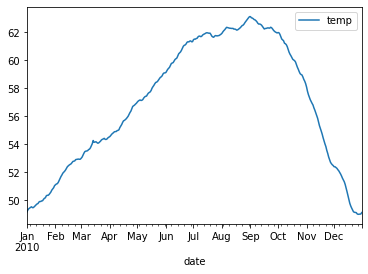

In [8]:
# visualizing the average over time with .plot()
df1.plot()

2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
# resample 'D' for .min()
df2 = df.resample('D').min()

In [10]:
df2.head() # check_yo_head

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


<AxesSubplot:xlabel='date'>

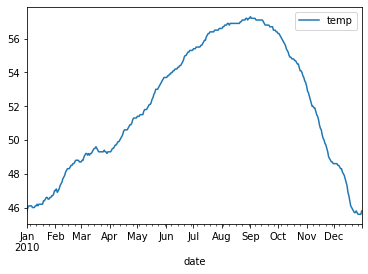

In [11]:
# visualizing the min over time with .plot()
df2.plot()

3. Write the code necessary to visualize the maximum temperature over time.

In [12]:
# resample 'D' for .max()
df3 = df.resample('D').max()

In [13]:
df3.head() # check_yo_head

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


<AxesSubplot:xlabel='date'>

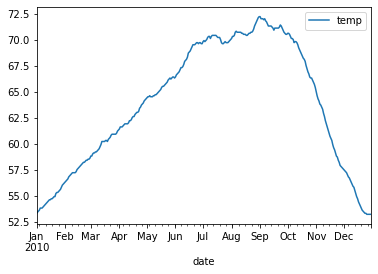

In [14]:
# visualizing the min over time with .plot()
df3.plot()

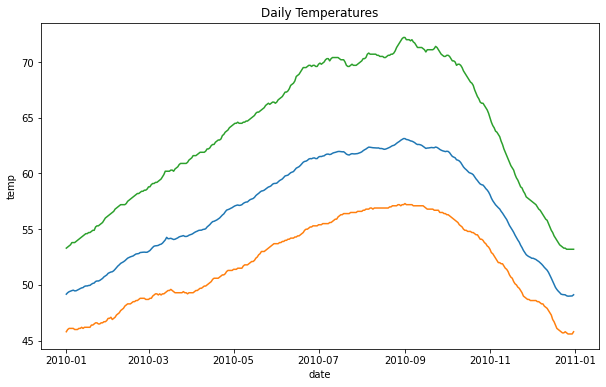

In [15]:
# putting all three graphs together on one graph
plt.figure(figsize=(10,6))
sns.lineplot(data=df1 , x=df1.index, y='temp')
sns.lineplot(data=df2 , x=df2.index, y='temp')
sns.lineplot(data=df3 , x=df3.index, y='temp')
plt.title('Daily Temperatures')

plt.show()

4. Which month is the coldest, on average?

In [16]:
df4 = df.resample('M').mean().index.max()

In [17]:
df4

Timestamp('2010-12-31 00:00:00', freq='M')

In [37]:
# getting the coldest month
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmin = df.resample('M').mean()

In [38]:
# January is the coldest month with an average of 49.98 degrees
dfmin.loc[dfmin['temp'] == dfmin.temp.min()]

,temp
date,
2010-01-31,49.98414


In [42]:
df.resample('M').mean().idxmin()[0]

Timestamp('2010-01-31 00:00:00')

In [43]:
df.resample('M').mean().sort_values(by='temp').head()

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139


5. Which month has the highest average temperature?

In [20]:
# getting the hottest month
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfminmax = df.temp.resample('D').agg(['min','max'])

In [21]:
# feeling 'hot', 'hot', 'hot'
dfminmax['dif'] = dfminmax['max'] - dfminmax['min']
dfminmax = dfminmax.resample('M').mean()
dfminmax.loc[dfminmax['dif'] == dfminmax.dif.max()]

,min,max,dif
date,,,
2010-09-30,56.903333,71.306667,14.403333


In [22]:
# another way of doing things for hottest month
print('The hottest month is:\n', 
      df.resample('M').mean().idxmax()[0], 
      'with an average of', 
      df.resample('M').mean().max().round(2)[0])

The hottest month is:
 2010-09-30 00:00:00 with an average of 62.49


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [23]:
# taking the resample to calulate the min and max temps
df_min_max = df.resample('D').agg(['min','max'])

In [24]:
df_min_max.head() # check_yo_head

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [25]:
# creating a new column for the 'change' in temps
df_min_max['change'] = df_min_max[('temp', 'max')] - df_min_max[('temp', 'min')]

In [26]:
df_min_max.head() # check_yo_head

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

In [27]:
df_min_max.change.resample('M').mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: change, dtype: float64

In [28]:
# getting the month with the max change
df_min_max.change.resample('M').mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

In [32]:
# getting the change value
df_min_max.change.resample('M').mean().max()

14.40333333333333

In [ ]:
# Which month has the highest daily temperature variability?
# September '2010-09-30'
# 14.40

In [ ]:
# importing new dataset
from vega_datasets import data
data.seattle_weather()

### Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [33]:
df = data.seattle_weather().set_index('date')

In [34]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [35]:
df1 = df.resample('M').sum()

In [36]:
df1

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.3,218.7,47.8,120.9
2012-02-29,92.3,269.0,92.9,113.2
2012-03-31,183.0,296.2,88.0,131.7
2012-04-30,68.1,446.2,179.8,101.2
2012-05-31,52.2,547.5,253.9,104.0
2012-06-30,75.1,560.8,314.4,92.5
2012-07-31,26.3,710.1,400.9,89.2
2012-08-31,0.0,801.6,434.3,87.7
2012-09-30,0.9,686.4,337.3,79.4
